Working directory: "/Users/buxinshe/Documents/git-repo/andes/bshe"
> Loaded generated Python code in "/Users/buxinshe/.andes/pycode".
Parsing input file "dist_1d_vsg2.xlsx"...
Input file parsed in 0.3954 seconds.
System internal structure set up in 0.0185 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0029 seconds.
0: |F(x)| = 1.699986647
1: |F(x)| = 0.2889191941
2: |F(x)| = 2.836400411e-06
3: |F(x)| = 2.908784325e-14
Converged in 4 iterations in 0.0031 seconds.
Initialization for dynamics completed in 0.0159 seconds.
Initialization was successful.

-> Eigenvalue Analysis:
  Positive       0
  Zeros         19
  Negative      78
Eigenvalue analysis finished in 0.0124 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time:

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler 1>: Line.Line_1 status changed to 0 at t=0.1 sec.


Simulation completed in 2.6421 seconds.


(<Figure size 480x800 with 10 Axes>,
 array([[<AxesSubplot:title={'center':'$\\delta$'}>, <AxesSubplot:>],
        [<AxesSubplot:title={'center':'$V_d$'}>,
         <AxesSubplot:title={'center':'$V_q$'}>],
        [<AxesSubplot:title={'center':'$I_d$'}>,
         <AxesSubplot:title={'center':'$I_q$'}>],
        [<AxesSubplot:title={'center':'$P_e$'}>,
         <AxesSubplot:title={'center':'$Q_e$'}>],
        [<AxesSubplot:title={'center':'$\\theta$'}>, <AxesSubplot:>]],
       dtype=object))

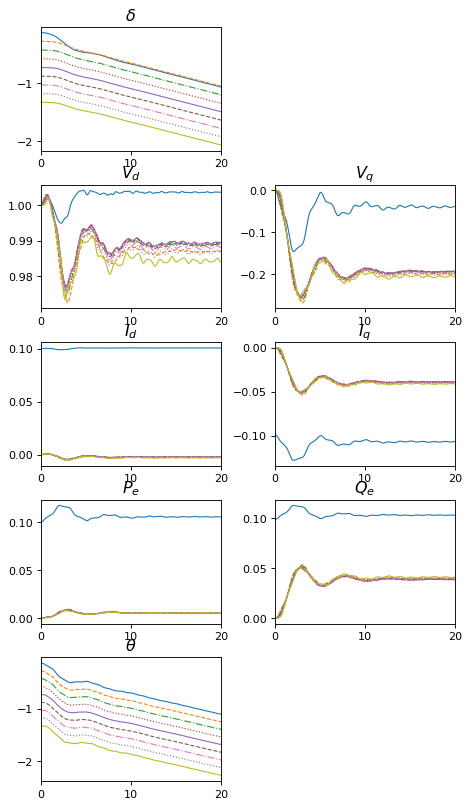

In [1]:
import andes
andes.config_logger(20)

ss = andes.load("dist_1d_vsg2.xlsx",
                setup=False, default_config=True, no_output=True)

ss.REGCVSG2.Kpvd.v = [0.2] * ss.REGCVSG2.n
ss.REGCVSG2.Kpvq.v = [0.2] * ss.REGCVSG2.n

ss.REGCVSG2.Kivd.v = [0.0] * ss.REGCVSG2.n
ss.REGCVSG2.Kivq.v = [0.0] * ss.REGCVSG2.n

ss.REGCVSG2.M.v = [0.5] * ss.REGCVSG2.n
ss.REGCVSG2.kw.v = [50] * ss.REGCVSG2.n

ss.setup()

ss.PFlow.run()

ss.EIG.run()

ss.TDS.config.tf = 200
ss.TDS.run()

ss.TDS.plt.panoview(ss.REGCV2, vars=["vd", 'vq', 'Id', 'Iq', 'Pe', 'Qe', 'a', 'delta'],
                    right=20, ncols=2)